In [1]:
# Loading important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from scipy import stats

#To plot figs on jupyter
%matplotlib inline
# figure size in inches
rcParams['figure.figsize'] = 14,6

In [2]:
"""
originall dataset is - lending_club_loans.csv
since there were some columns in last line of the file which caused error while loading data.
Hence those rows were deleted manually in excel which was not necessary in the visualization.
"""

# Loading the raw loan stats dataset
df = pd.read_csv("Downloads\lending_club_loans1.csv", low_memory=False)

In [3]:
# performing eda with sweetviz to see how the data is distributed

import sweetviz 
my_report = sweetviz.analyze([df, "Lending Club Sweetviz Analysis"])

# show report in html format

my_report.show_html('Report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### After checking above generated html we understand that there are lot of null values and missing data which should be handled based on their use to perform visualization and answering question with the help of data.

In [4]:
# visualizing  dataset with pandas profiling to see how the values are in nature

from pandas_profiling import ProfileReport
profile = ProfileReport(df,title='Lending Club Pandas Profiling', html = {'style' : {'full_width':True}})

# print html format

profile.to_file("Loan_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\mdhas\Anaconda3\lib\site-packages\pandas_profiling\model\correlations.py:61: UserWarning: There was an attempt to calculate the cramers correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"cramers": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/pandas-profiling/pandas-profiling/issues
(include the error message: 'No data; `observed` has size 0.')
  (include the error message: '{error}')"""
C:\Users\mdhas\Anaconda3\lib\site-packages\missingno\missingno.py:250: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=fontsize)
C:\Users\mdhas\Anaconda3\lib\site-packages\pandas_profiling\model\missing.py:95: UserWarning: There was an attempt to generate the Count missing values diagrams, but this failed.
To hide this warning, disable the calculation
(us

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
# Looking at the top 5 rows to understand data
pd.set_option('display.max_columns', None)

df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,11-Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,735.0,739.0,1.0,NaN,NaN,3.0,0.0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0,15-Jan,171.62,NaN,16-Sep,744.0,740.0,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,11-Dec-2015,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,740.0,744.0,5.0,NaN,NaN,3.0,0.0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,13-Apr,119.66,NaN,16-Sep,499.0,0.0,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,11-Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,1-Nov,735.0,739.0,2.0,NaN,NaN,2.0,0.0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0,14-Jun,649.91,NaN,16-Sep,719.0,715.0,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,11-Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,690.0,694.0,1.0,35.0,NaN,10.0,0.0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89

In [6]:
# Size of the dataset
df.shape

(42539, 115)

In [7]:
# Checking info of the raw dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42539 entries, 0 to 42538
Columns: 115 entries, id to total_il_high_credit_limit
dtypes: float64(85), object(30)
memory usage: 37.3+ MB


In [8]:
df.isnull().sum()

id                                2
member_id                         4
loan_amnt                         4
funded_amnt                       4
funded_amnt_inv                   4
                              ...  
tax_liens                       110
tot_hi_cred_lim               42539
total_bal_ex_mort             42539
total_bc_limit                42539
total_il_high_credit_limit    42539
Length: 115, dtype: int64

In [9]:
# Total percentage of null values in the data
(df.isnull().sum().sum())/(df.shape[0]*df.shape[1])

0.49501684898870296

Most of the columns are float but there are some categorical columns stored as objects. We will look into this issue in the subsequent steps after deciding upon the final columns to consider in the final dataframe .

C:\Users\mdhas\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


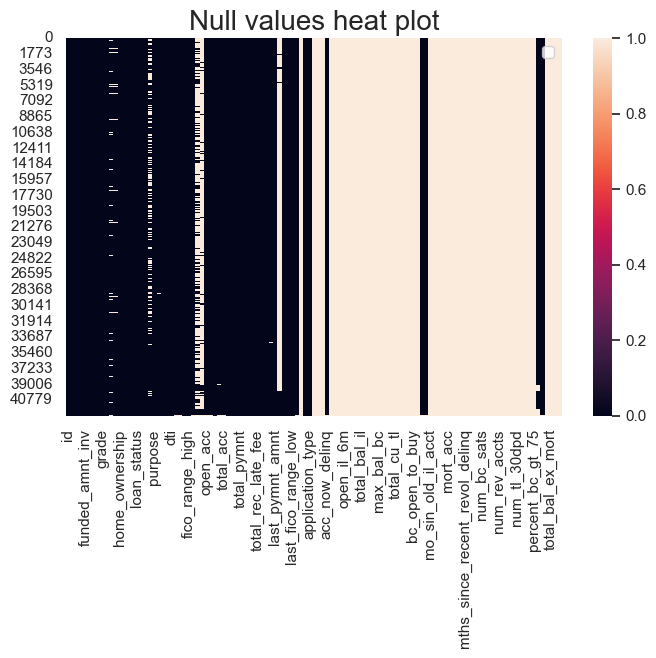

In [11]:
# Checking for null values using a heat map as a visualizing tool

import sys
sns.set(rc={'figure.figsize':(8,5)})
sns.set_style('whitegrid')
sns.heatmap(df.isnull())
plt.title('Null values heat plot',fontdict={'fontsize': 20})
plt.legend(df.isnull())
plt.show()

plt.savefig("heatmap.png") # save as png

As we can see from the above heatmap, there are lot of null values in the dataset. We have to carefully deal with these null values.


In [16]:
# Creating a dataframe to display percentage of null values in each column
a = pd.DataFrame()
a['Percentage of null values']=['10% or less','20% or less','30% or less','40% or less','50% or less','60% or less','70% or less']

ten_percent = len(df.columns[((df.isnull().sum())/len(df)) < 0.1])
twenty_percent = len(df.columns[((df.isnull().sum())/len(df)) < 0.2])
thirty_percent = len(df.columns[((df.isnull().sum())/len(df)) < 0.3])
fourty_percent = len(df.columns[((df.isnull().sum())/len(df)) < 0.4])
fifty_percent = len(df.columns[((df.isnull().sum())/len(df)) < 0.5])
sixty_percent = len(df.columns[((df.isnull().sum())/len(df)) < 0.6])
seventy_percent = len(df.columns[((df.isnull().sum())/len(df)) < 0.7])


a['No.of columns'] = [ten_percent,twenty_percent,thirty_percent,fourty_percent,fifty_percent,sixty_percent,seventy_percent]
a

,Percentage of null values,No.of columns
0,10% or less,57
1,20% or less,57
2,30% or less,57
3,40% or less,58
4,50% or less,58
5,60% or less,58
6,70% or less,58


In [13]:
# Considering only those columns which have null values less than 40% in that particular column
df = pd.read_csv("Downloads\lending_club_loans1.csv", low_memory=False)
df = df[df.columns[((df.isnull().sum())/len(df)) < 0.4]]
df.shape

(42539, 58)

By considering columns with less number of null values, we were able to decrease total number of columns from 115 to 58.

In [14]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,11-Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,735.0,739.0,1.0,3.0,0.0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0,15-Jan,171.62,16-Sep,744.0,740.0,0.0,1,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,11-Dec-2015,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,740.0,744.0,5.0,3.0,0.0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,13-Apr,119.66,16-Sep,499.0,0.0,0.0,1,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,11-Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,1-Nov,735.0,739.0,2.0,2.0,0.0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0,14-Jun,649.91,16-Sep,719.0,715.0,0.0,1,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,11-Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,690.0,694.0,1.0,10.0,0.0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0,15-Jan,357.48,16-Apr,604.0,600.0,0.0,1,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,11-Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,695.0,699.0,0.0,15.0,0.0,27783,53.90%,38,f,270.78,270.78,3784.490000,3784.49,2729.22,1055.27,0.00,0.00,0,16-Sep,67.79,16-Sep,694.0,690.0,0.0,1,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [15]:
# Checking info of updated dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42539 entries, 0 to 42538
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          42537 non-null  object 
 1   member_id                   42535 non-null  float64
 2   loan_amnt                   42535 non-null  float64
 3   funded_amnt                 42535 non-null  float64
 4   funded_amnt_inv             42535 non-null  float64
 5   term                        42535 non-null  object 
 6   int_rate                    42535 non-null  object 
 7   installment                 42535 non-null  float64
 8   grade                       42535 non-null  object 
 9   sub_grade                   42535 non-null  object 
 10  emp_title                   39909 non-null  object 
 11  emp_length                  41423 non-null  object 
 12  home_ownership              42535 non-null  object 
 13  annual_inc                  425

There are still some columns like emp_title and desc which have lot of null values. In the following steps, we will look i nto other columns as well to check for their importance and then decide on whether to include them in the final dataframe. 

## Understanding Features

In [17]:
# Considering 'term' feature
df.term.value_counts()

 36 months    31534
 60 months    11001
Name: term, dtype: int64

There are only two values 'term' column can take. Clearly, it is a categorical feature. Since, the value it takes is ordinal(i., no.of months), we can consider label encoding it rather than one hot encoding.

In [18]:
# Considering 'grade' feature
df.grade.value_counts()

B    12389
A    10183
C     8740
D     6016
E     3394
F     1301
G      512
Name: grade, dtype: int64

In [19]:
# Considering 'sub_grade' feature
df.sub_grade.value_counts()

B3    2997
A4    2905
B5    2807
A5    2793
B4    2590
C1    2264
C2    2157
B2    2113
B1    1882
A3    1823
C3    1658
A2    1520
D2    1485
C4    1370
D3    1322
C5    1291
A1    1142
D4    1140
D1    1053
D5    1016
E1     884
E2     791
E3     668
E4     552
E5     499
F1     392
F2     308
F3     236
F4     211
F5     154
G1     141
G2     107
G4      99
G5      86
G3      79
Name: sub_grade, dtype: int64

Both grade and sub_grade features are categorical feature. We can perform label encoding on top of these features.

In [20]:
df.emp_title.value_counts()

US Army                             139
Bank of America                     115
IBM                                  72
Kaiser Permanente                    61
AT&T                                 61
                                   ... 
Regional Elite Airlines Services      1
Mass General Medical Group            1
Kontera                               1
Southeast Georgia Health ystem        1
Homemaker                             1
Name: emp_title, Length: 30658, dtype: int64

'emp_title' feature has many unique values in it and it doesn't add any information for our questions. It's better to drop this column.


### Instead of checking every column of 53 columns like above, here we are running a for loop on top of 'object' columns and take a decison based on the output of this cell.


In [21]:
# Checking columns that are of dtype 'object'
df.columns[df.dtypes == 'object']

Index(['id', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'delinq_2yrs', 'earliest_cr_line',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'collection_recovery_fee', 'last_pymnt_d', 'last_credit_pull_d',
       'policy_code', 'application_type'],
      dtype='object')

In [22]:
# Instead of checking every column of 53 columns like above, here we are running a for loop on top of 'object' columns and take a decison based on the output of this cell.
for i in df.columns[df.dtypes == 'object']:
    print(df[i].value_counts())
    print('************************')

1077501                                    1
540348                                     1
540300                                     1
540270                                     1
540280                                     1
                                          ..
769217                                     1
770000                                     1
765994                                     1
769973                                     1
Total amount funded in policy code 2: 0    1
Name: id, Length: 42537, dtype: int64
************************
 36 months    31534
 60 months    11001
Name: term, dtype: int64
************************
10.99%    970
11.49%    837
13.49%    832
7.51%     787
7.88%     742
         ... 
17.46%      1
21.48%      1
24.40%      1
16.83%      1
16.20%      1
Name: int_rate, Length: 394, dtype: int64
************************
B    12389
A    10183
C     8740
D     6016
E     3394
F     1301
G      512
Name: grade, dtype: int64
************************
B3 

CA       7428
NY       4065
FL       3104
TX       2915
NJ       1988
IL       1672
PA       1651
GA       1503
VA       1487
MA       1438
OH       1329
MD       1125
AZ        933
WA        888
CO        857
NC        830
CT        816
MI        796
MO        765
MN        652
NV        527
WI        516
SC        489
AL        484
OR        468
LA        461
KY        359
OK        317
KS        298
UT        278
AR        261
DC        224
RI        208
NM        205
NH        188
WV        187
HI        181
DE        136
MT         96
WY         87
AK         86
SD         67
VT         57
TN         32
MS         26
IN         19
IA         12
NE         11
ID          9
ME          3
16.33       1
Name: addr_state, dtype: int64
************************
0         37771
1          3594
2           771
3           244
4            72
5            27
6            13
7             6
8             3
11            2
9             1
Jan-97        1
13            1
Name: delinq_2yrs, dty

In [23]:
# Similarly, checking some numerical columns
col = ['acc_now_delinq','chargeoff_within_12_mths','collections_12_mths_ex_med','delinq_amnt','policy_code','tax_liens']
for i in col:
    print(df[i].value_counts())
    print('************************')

0.0    42501
1.0        4
Name: acc_now_delinq, dtype: int64
************************
0.0    42390
Name: chargeoff_within_12_mths, dtype: int64
************************
0.0    42389
Name: collections_12_mths_ex_med, dtype: int64
************************
0.0       42503
27.0          1
6053.0        1
Name: delinq_amnt, dtype: int64
************************
1             42534
INDIVIDUAL        1
Name: policy_code, dtype: int64
************************
0.0    42428
1.0        1
Name: tax_liens, dtype: int64
************************


In [24]:
# Drop irrelevant columns as these columns are not needed 

df.drop(['id', 'member_id', 'emp_title', 'url', 'desc', 'zip_code', 'title'], axis=1, inplace=True)

C:\Users\mdhas\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


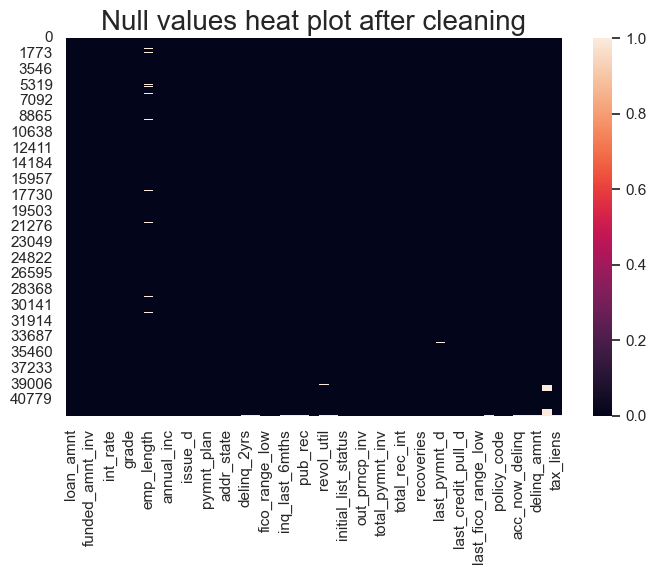

In [26]:
# Checking for null values in the updated dataframe
sns.heatmap(df.isnull())
plt.show()
plt.title('Null values heat plot after cleaning',fontdict={'fontsize': 20})
plt.savefig("heatmap1.png") # save as png

In [27]:
df.isnull().sum()

loan_amnt                        4
funded_amnt                      4
funded_amnt_inv                  4
term                             4
int_rate                         4
installment                      4
grade                            4
sub_grade                        4
emp_length                    1116
home_ownership                   4
annual_inc                       8
verification_status              4
issue_d                          4
loan_status                      4
pymnt_plan                       4
purpose                          4
addr_state                       4
dti                              4
delinq_2yrs                     33
earliest_cr_line                33
fico_range_low                   4
fico_range_high                  4
inq_last_6mths                  33
open_acc                        33
pub_rec                         33
revol_bal                        4
revol_util                      94
total_acc                       33
initial_list_status 

In [28]:
# Displaying all the columns

pd.set_option('display.max_columns', None)

df.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,11-Dec-2015,Fully Paid,n,credit_card,AZ,27.65,0,Jan-85,735.0,739.0,1.0,3.0,0.0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0,15-Jan,171.62,16-Sep,744.0,740.0,0.0,1,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,11-Dec-2015,Charged Off,n,car,GA,1.00,0,Apr-99,740.0,744.0,5.0,3.0,0.0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,13-Apr,119.66,16-Sep,499.0,0.0,0.0,1,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,11-Dec-2015,Fully Paid,n,small_business,IL,8.72,0,1-Nov,735.0,739.0,2.0,2.0,0.0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0,14-Jun,649.91,16-Sep,719.0,715.0,0.0,1,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,11-Dec-2015,Fully Paid,n,other,CA,20.00,0,Feb-96,690.0,694.0,1.0,10.0,0.0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0,15-Jan,357.48,16-Apr,604.0,600.0,0.0,1,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,11-Dec-2015,Current,n,other,OR,17.94,0,Jan-96,695.0,699.0,0.0,15.0,0.0,27783,53.90%,38,f,270.78,270.78,3784.490000,3784.49,2729.22,1055.27,0.00,0.00,0,16-Sep,67.79,16-Sep,694.0,690.0,0.0,1,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [29]:
# Checking for null values
# Percentage of null values
a = (df.isnull().sum()/df.shape[0])*100
b = a[a>0.05]
b = pd.DataFrame(b,columns=['Percentage of null values'])
b.sort_values(by=['Percentage of null values'],ascending=False)

,Percentage of null values
pub_rec_bankruptcies,3.218223
emp_length,2.623475
collections_12_mths_ex_med,0.352618
chargeoff_within_12_mths,0.350267
tax_liens,0.258586
revol_util,0.220974
last_pymnt_d,0.204518
acc_now_delinq,0.079927
delinq_amnt,0.079927
delinq_2yrs,0.077576


C:\Users\mdhas\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  import sys


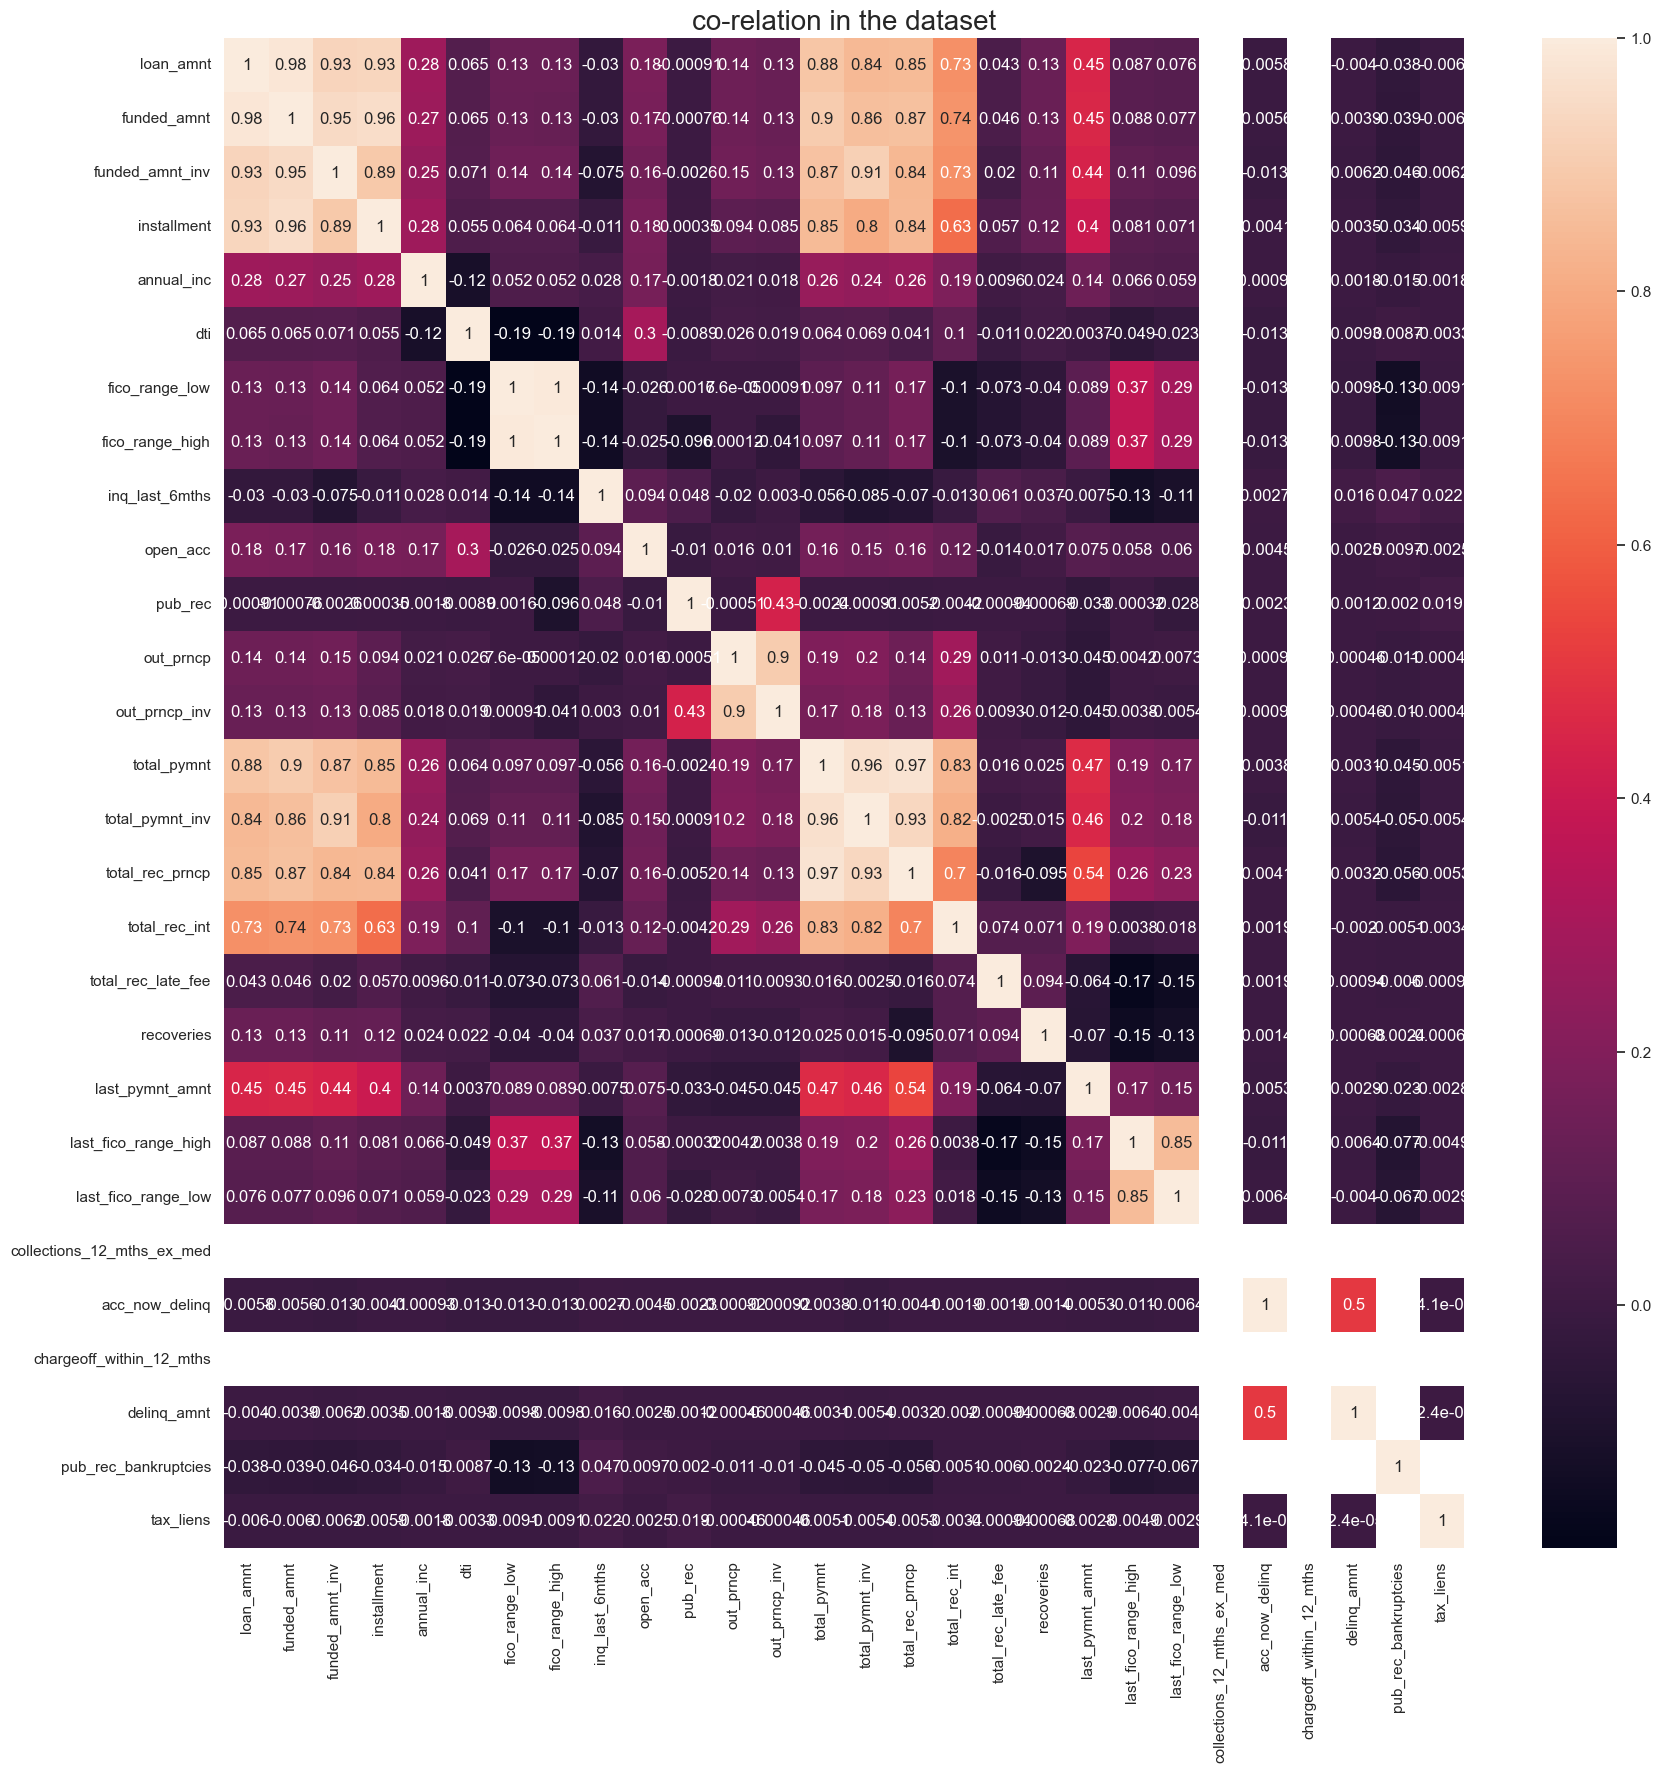

In [30]:
# Checking correlation using heatmap to visualise it.
sns.set(rc={'figure.figsize':(20,20)})
sns.set_style('whitegrid')
# Heatmap
sns.heatmap(df.corr(),annot=True)
plt.title('co-relation in the dataset',fontdict={'fontsize': 20})
plt.show()
plt.savefig("heatmapcor.png") # save as png

We can see some columns having high correlation but we aren't dropping these columns. These columns might not be even considered while solving our particular question. For example, we will not consider any future transactions(like total_pymnt.total_pymnt_inv) when tring to classify if the loan will be paid back by customer.

In [31]:
# Checking the final shape of the dataframe
df.shape

(42539, 51)

In [32]:
# Checking if still there are any null values
df.isnull().sum()

loan_amnt                        4
funded_amnt                      4
funded_amnt_inv                  4
term                             4
int_rate                         4
installment                      4
grade                            4
sub_grade                        4
emp_length                    1116
home_ownership                   4
annual_inc                       8
verification_status              4
issue_d                          4
loan_status                      4
pymnt_plan                       4
purpose                          4
addr_state                       4
dti                              4
delinq_2yrs                     33
earliest_cr_line                33
fico_range_low                   4
fico_range_high                  4
inq_last_6mths                  33
open_acc                        33
pub_rec                         33
revol_bal                        4
revol_util                      94
total_acc                       33
initial_list_status 

##### There are still few null values which we will deal in the end after pre-processing few more numerical columns.

C:\Users\mdhas\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mdhas\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mdhas\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

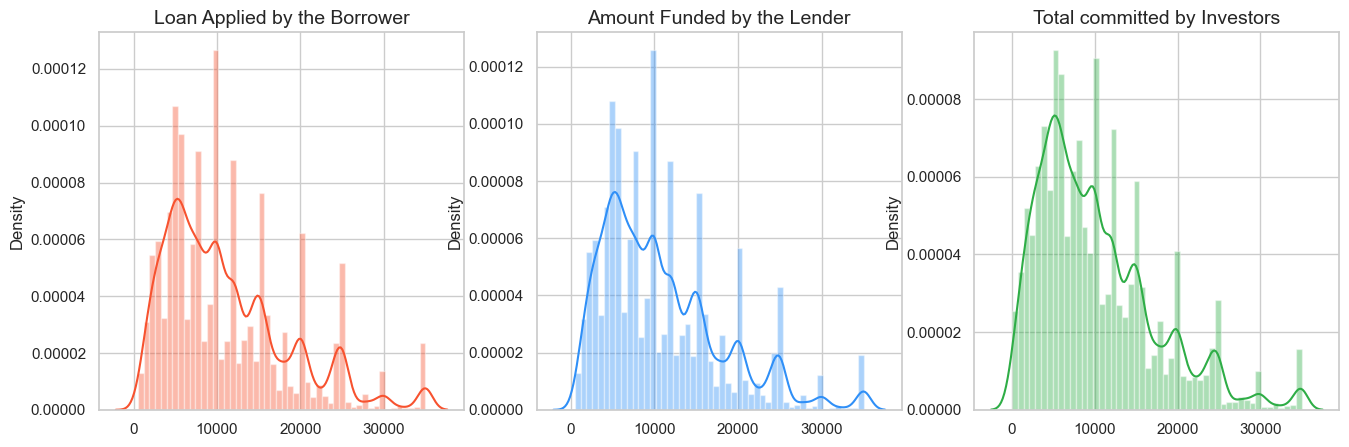

In [33]:
# to check the amount funded is equal to loan applied by customer.

fig, ax = plt.subplots(1, 3, figsize=(16,5))




loan_amount = df["loan_amnt"].values
funded_amount = df["funded_amnt"].values
investor_funds = df["funded_amnt_inv"].values


sns.distplot(loan_amount, ax=ax[0], color="#F7522F")
ax[0].set_title("Loan Applied by the Borrower", fontsize=14)
sns.distplot(funded_amount, ax=ax[1], color="#2F8FF7")
ax[1].set_title("Amount Funded by the Lender", fontsize=14)
sns.distplot(investor_funds, ax=ax[2], color="#2EAD46")
ax[2].set_title("Total committed by Investors", fontsize=14)

plt.savefig("distplot.png") # save as png

In [34]:
# Lets' transform the issue dates by year.
df['issue_d'].head()
dt_series = pd.to_datetime(df['issue_d'])
df['year'] = dt_series.dt.year

C:\Users\mdhas\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


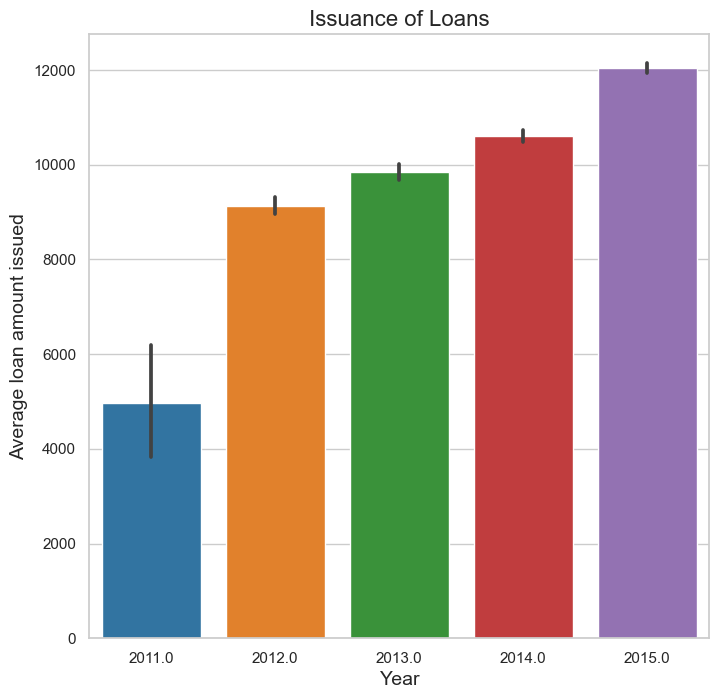

In [35]:
# The year of 2015 was the year were the highest amount of loans were issued 
# This is an indication that the economy is quiet recovering itself.

plt.figure(figsize=(8,8))
sns.barplot('year', 'loan_amnt', data=df, palette='tab10')
plt.title('Issuance of Loans', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average loan amount issued', fontsize=14)
plt.savefig("barplot.png") # save as png

# we can understand that year 2015 was the year where highest number of loans were issued.

# Our Target would be the Purpose values.

Let's understand which type of category values we have
We need To select loans that are fully paid and that are not fully paid, removing current loans

C:\Users\mdhas\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


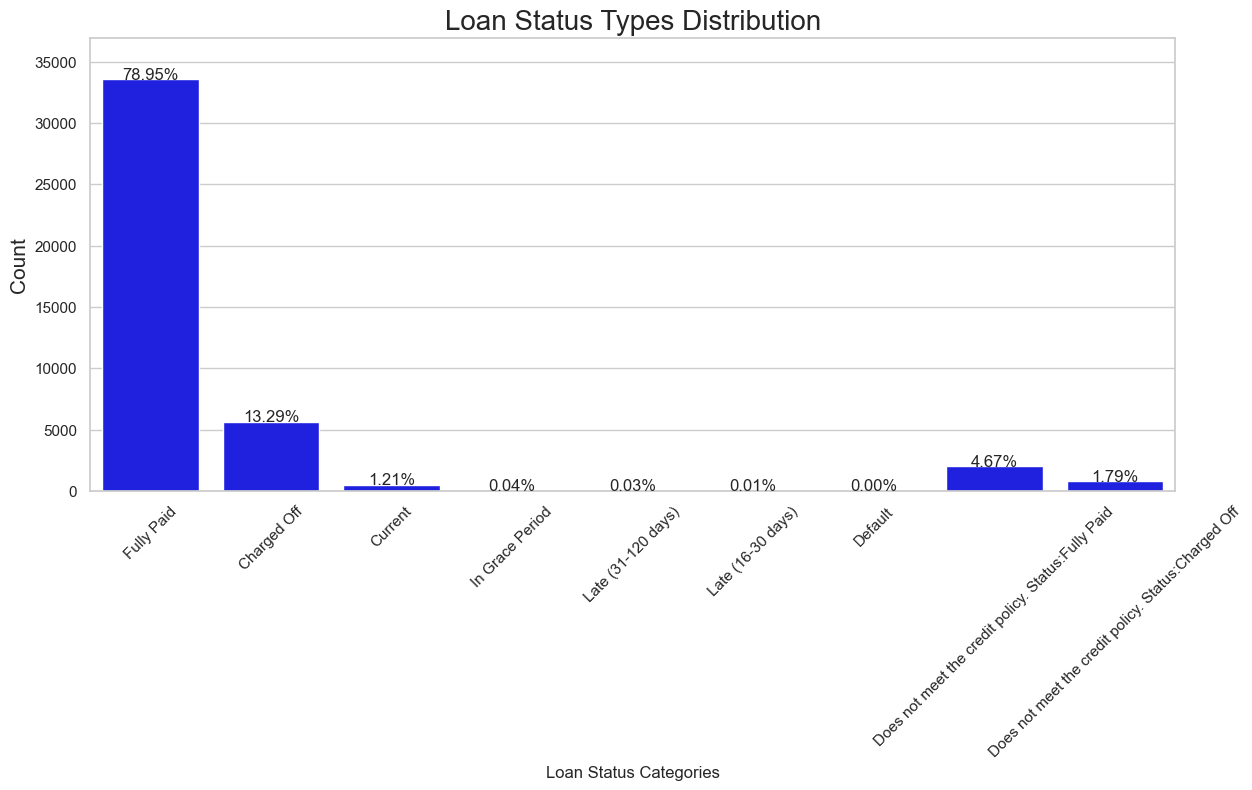

In [36]:
total = len(df)

plt.figure(figsize = (14,6))

g = sns.countplot(x="loan_status", data=df, 
                  color='blue')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Loan Status Categories", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Loan Status Types Distribution", fontsize=20)
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g.set_ylim(0, max(sizes) * 1.10)

plt.show()
plt.savefig("countplot.png") # save as png

# Purpose

Purpose - A category provided by the borrower for the loan request.
As it a categorical feature that says what's the purpose to the loan, would be interesting to start by Purpose.

C:\Users\mdhas\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


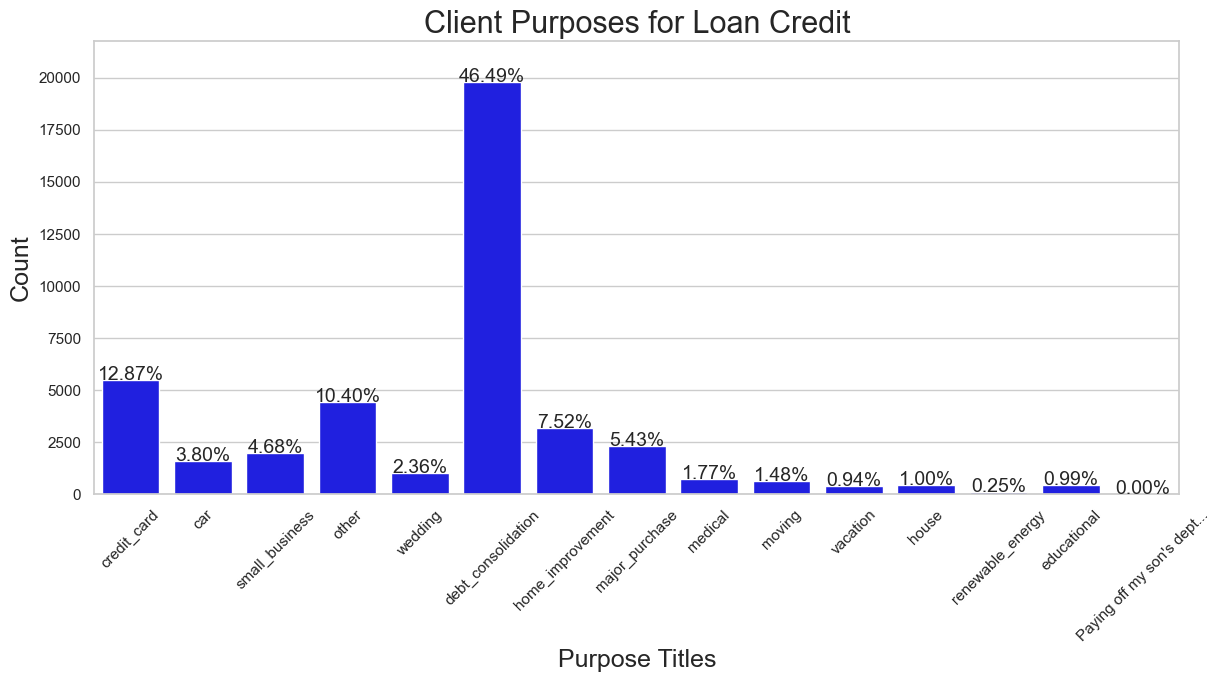

In [37]:
plt.figure(figsize=(14,6))

g = sns.countplot(x='purpose', data=df, 
                  color='blue')
g.set_title("Client Purposes for Loan Credit", fontsize=22)
g.set_xlabel("Purpose Titles", fontsize=18)
g.set_ylabel('Count', fontsize=18)

sizes=[]

for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 
    
g.set_ylim(0, max(sizes) * 1.10)
g.set_xticklabels(g.get_xticklabels(),
                  rotation=45)

plt.show()
plt.savefig("countplot1.png") # save as png

# Cool! The top 3 purposes are:

56.5% of the Loans are to Debt Consolidation

22.87% are to pay Credit Card

6.67% to Home Improvement

In [38]:
df['issue_month'], df['issue_year'] = df['issue_d'].str.split('-', 1).str

C:\Users\mdhas\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


# Crosstab - Loan Status by Grade

In [40]:
loan_grade = ['loan_status', 'grade']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df[loan_grade[0]], df[loan_grade[1]]).style.background_gradient(cmap = cm)

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,602,1430,1353,1126,720,321,101
Current,20,149,122,107,74,35,6
Default,0,0,0,0,1,0,0
Does not meet the credit policy. Status:Charged Off,8,85,148,197,158,93,72
Does not meet the credit policy. Status:Fully Paid,90,269,481,494,378,154,122
Fully Paid,9462,10448,6632,4087,2052,695,210
In Grace Period,0,2,2,2,8,1,1
Late (16-30 days),1,3,0,1,0,0,0
Late (31-120 days),0,3,2,2,3,2,0


In [41]:
df["loan_status"].value_counts()

Fully Paid                                             33586
Charged Off                                             5653
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Current                                                  513
In Grace Period                                           16
Late (31-120 days)                                        12
Late (16-30 days)                                          5
Default                                                    1
Name: loan_status, dtype: int64

In [42]:
# Determining the loans that are bad from loan_status column

bad_loan = ["Charged Off", "Default", "Does not meet the credit policy. Status:Charged Off", "In Grace Period", 
            "Late (16-30 days)", "Late (31-120 days)"]


df['loan_condition'] = np.nan

def loan_condition(status):
    if status in bad_loan:
        return 'Bad Loan'
    else:
        return 'Good Loan'
    
    
df['loan_condition'] = df['loan_status'].apply(loan_condition)

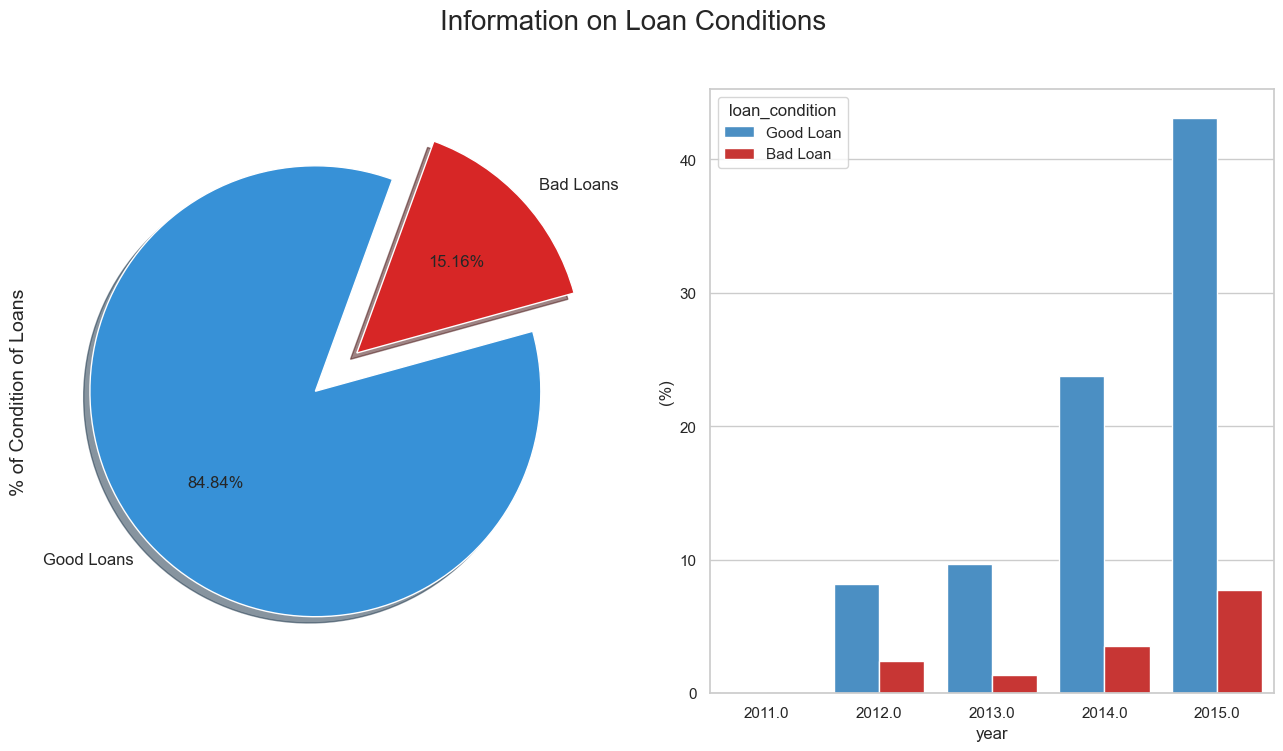

In [44]:
# determining good loan percentage vs bad loans with pie chart and on yearly basis.


f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#3791D7", "#D72626"]
labels ="Good Loans", "Bad Loans"

plt.suptitle('Information on Loan Conditions', fontsize=20)

df["loan_condition"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=70)


# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

# sns.countplot('loan_condition', data=df, ax=ax[1], palette=colors)
# ax[1].set_title('Condition of Loans', fontsize=20)
# ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')
palette = ["#3791D7", "#E01E1B"]

sns.barplot(x="year", y="loan_amnt", hue="loan_condition", data=df, palette=palette, estimator=lambda x: len(x) / len(df) * 100)
ax[1].set(ylabel="(%)")
plt.savefig("piechart.png") # save as png

In [45]:
df['addr_state'].unique()

# Make a list with each of the regions by state.

west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
south_west = ['AZ', 'TX', 'NM', 'OK']
south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']



df['region'] = np.nan

def finding_regions(state):
    if state in west:
        return 'West'
    elif state in south_west:
        return 'SouthWest'
    elif state in south_east:
        return 'SouthEast'
    elif state in mid_west:
        return 'MidWest'
    elif state in north_east:
        return 'NorthEast'
    


df['region'] = df['addr_state'].apply(finding_regions)

In [46]:
# This code will take the current date and transform it into a year-month format
df['complete_date'] = pd.to_datetime(df['issue_d'])

group_dates = df.groupby(['complete_date', 'region'], as_index=False).sum()

group_dates['issue_d'] = [month.to_period('M') for 
                          month in group_dates['complete_date']]

group_dates = group_dates.groupby(['issue_d', 'region'], as_index=False).sum()
group_dates = group_dates.groupby(['issue_d', 'region'], as_index=False).sum()
group_dates['loan_amnt'] = group_dates['loan_amnt']/1000


df_dates = pd.DataFrame(data=group_dates[['issue_d','region','loan_amnt']])

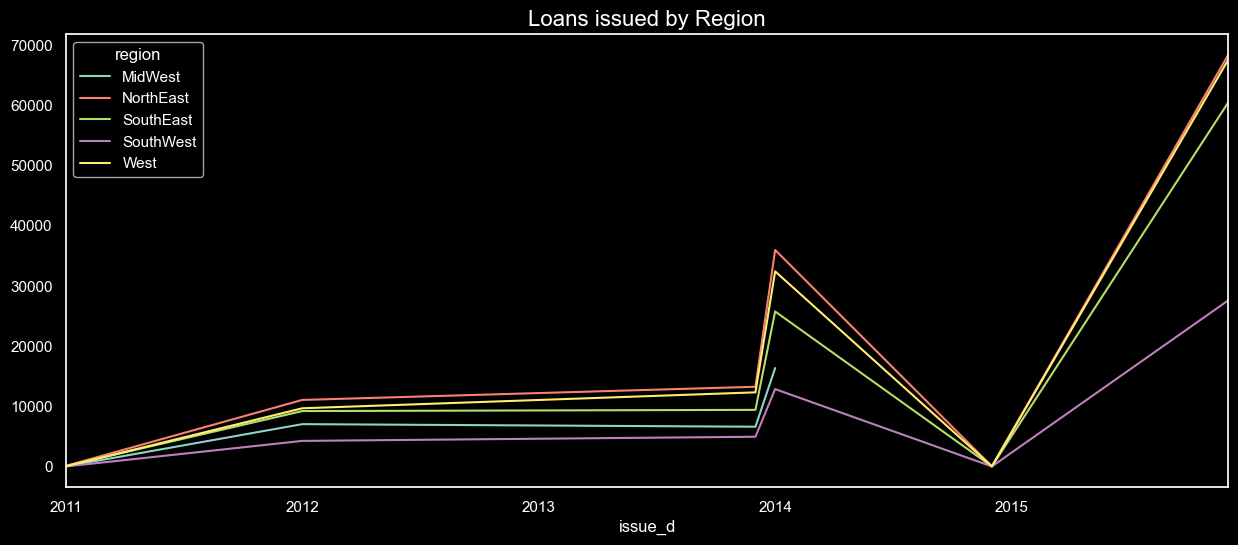

In [47]:
plt.style.use('dark_background')
cmap = plt.cm.Set3

by_issued_amount = df_dates.groupby(['issue_d', 'region']).loan_amnt.sum()
by_issued_amount.unstack().plot(stacked=False, colormap=cmap, grid=False, legend=True, figsize=(15,6))

plt.title('Loans issued by Region', fontsize=16)
plt.savefig("map.png") # save as png

# A Deeper Look into Bad Loans:

What we need to know:
The number of loans that were classified as bad loans for each region by its loan status. (This will be shown in a dataframe below.)
This won't give us the exact reasons why a loan is categorized as a bad loan (other variables that might have influence the condition of the loan) but it will give us a deeper insight on the level of risk in a particular region.

# Summary:
The regions of the West and SouthEast had a higher percentage in most of the b "bad" loan statuses.

The NorthEast region had a higher percentage in Grace Period and Does not meet Credit Policy loan status. However, both of these are not considered as bad as default for instance.

Based on this small and brief summary we can conclude that the West and SouthEast regions have the most undesirable loan status, but just by a slightly higher percentage compared to the NorthEast region.

Again, this does not tell us what causes a loan to be a bad loan , but it gives us some idea about the level of risk within the regions across the United States.

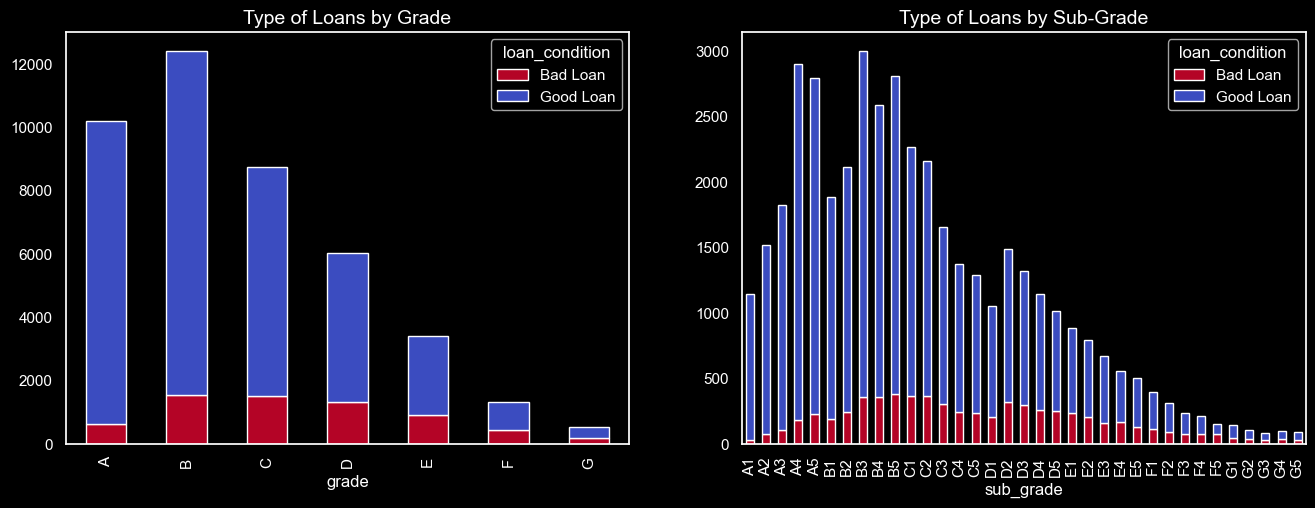

In [48]:
# barplot to see types of loans by grade and subgrade.

fig = plt.figure(figsize=(16,12))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

cmap = plt.cm.coolwarm_r

loans_by_region = df.groupby(['grade', 'loan_condition']).size()
loans_by_region.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax1, grid=False)
ax1.set_title('Type of Loans by Grade', fontsize=14)


loans_by_grade = df.groupby(['sub_grade', 'loan_condition']).size()
loans_by_grade.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax2, grid=False)
ax2.set_title('Type of Loans by Sub-Grade', fontsize=14)
plt.savefig("barplot2.png") # save as png

### from above data we can understand

- type of loans issued by grade and subgrade 
- the graph shows which group has how many % of bad loans 